In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
os.chdir('C:/Users/DELL/Pandas')

In [3]:
df = pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.shape

(29531, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

<Axes: >

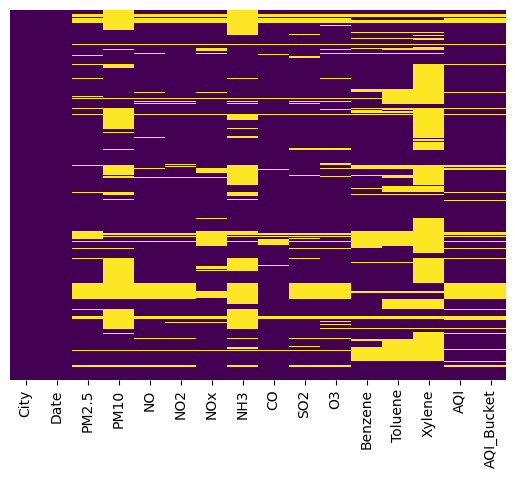

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') ### Heatmap of location of null values in dataset

In [8]:
## Getting Summary of Data
df.describe((.25,.5,.75,.90,.95,.99)).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,139.890,193.9600,311.0640,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,231.880,303.3400,444.6090,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,40.050,61.1900,116.2768,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,58.155,74.1250,117.1240,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,69.360,96.3575,154.2530,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,48.330,63.4270,130.5560,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,2.630,8.0245,34.5316,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,29.680,46.2080,102.6792,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,62.012,74.1420,105.3212,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,6.090,9.7200,28.6793,455.03


In [9]:
feature_col =  df.select_dtypes(exclude = 'object').columns
feature_col

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

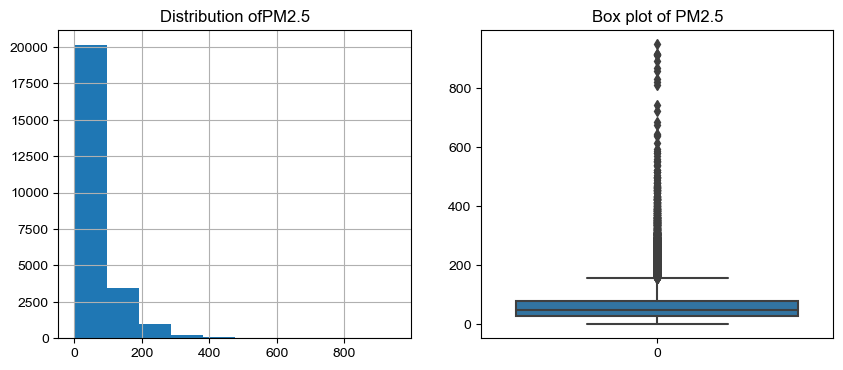

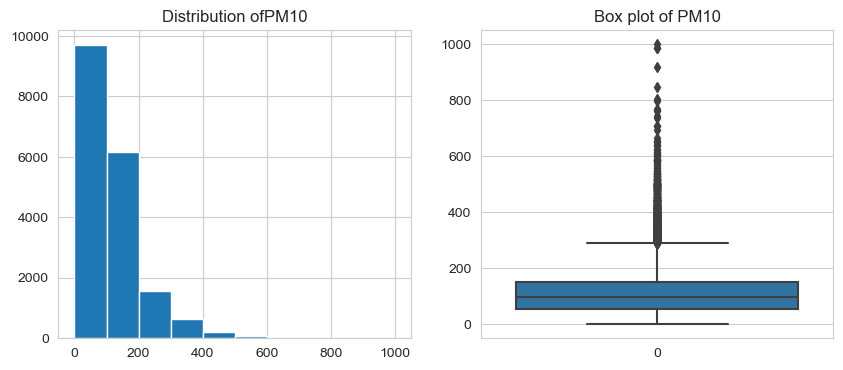

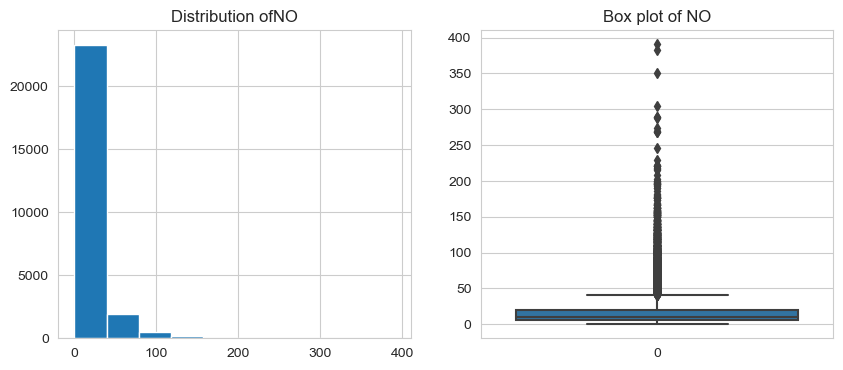

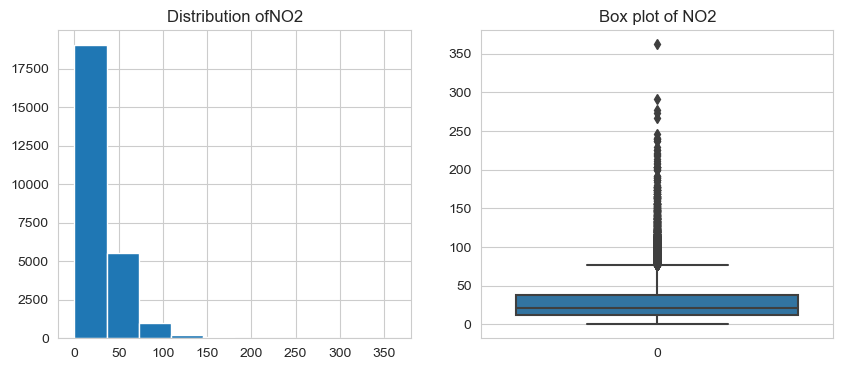

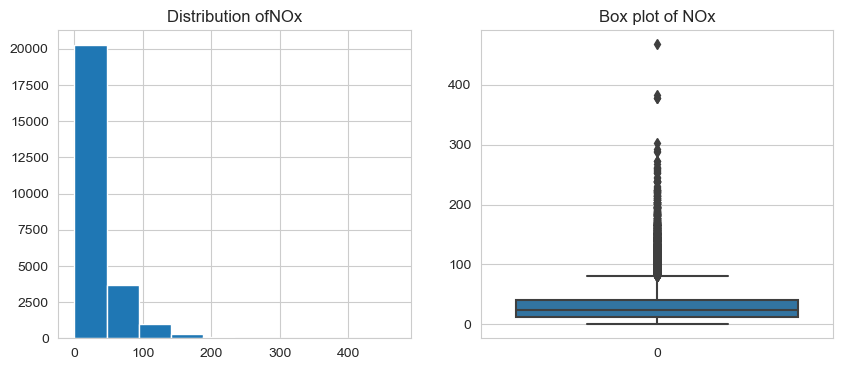

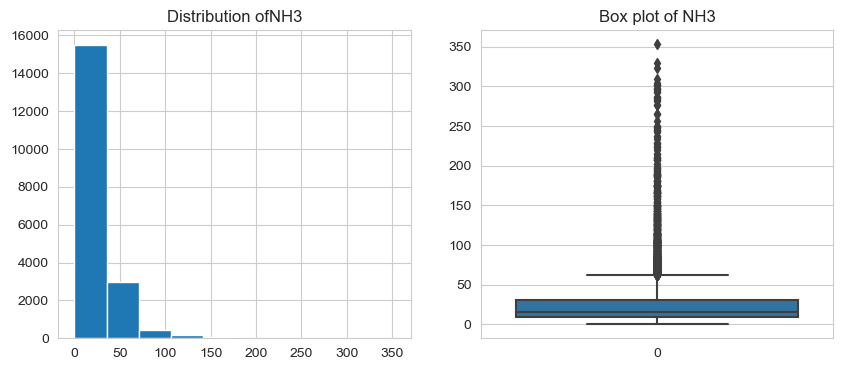

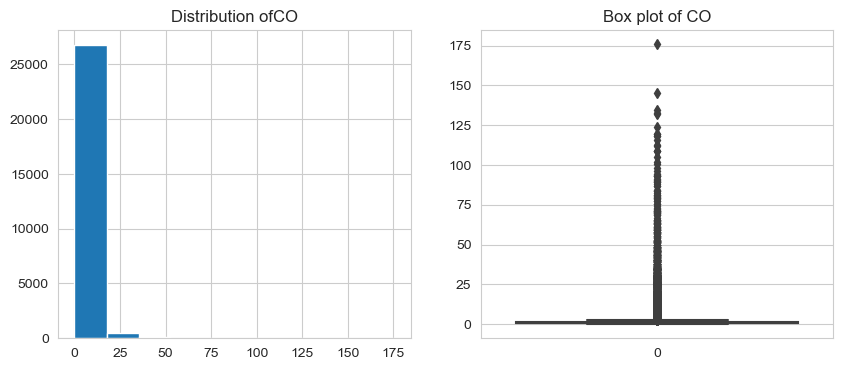

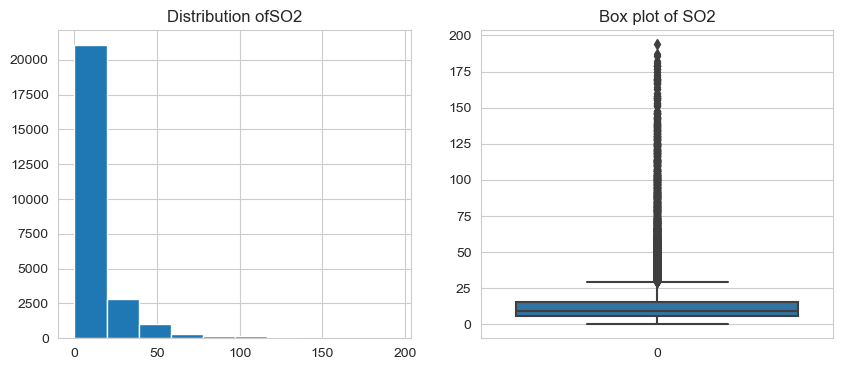

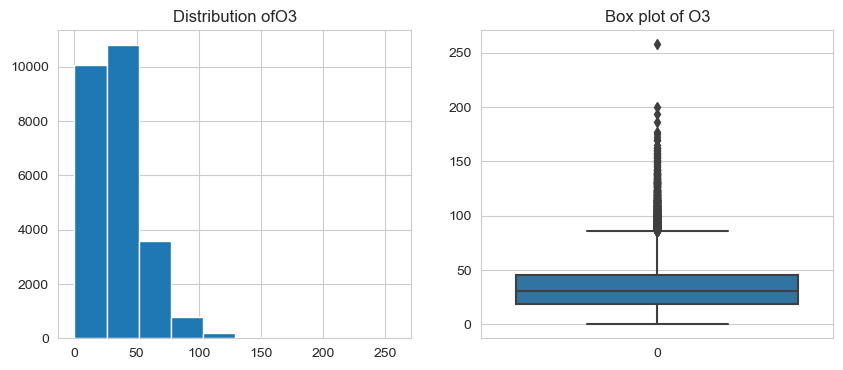

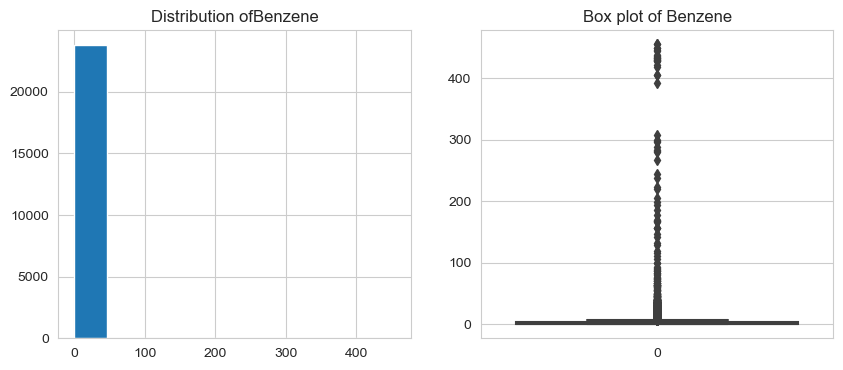

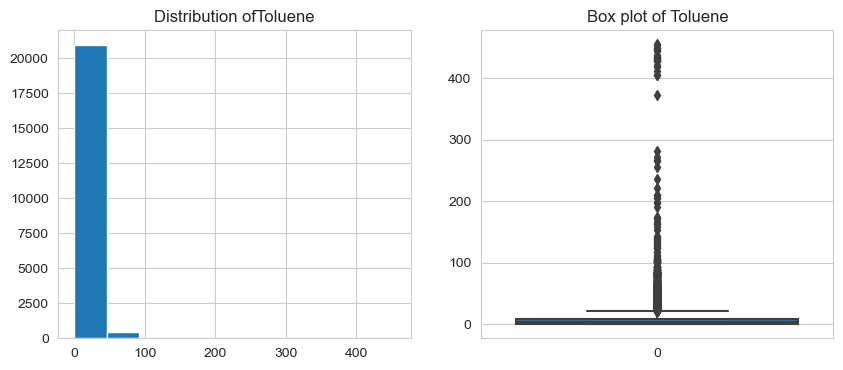

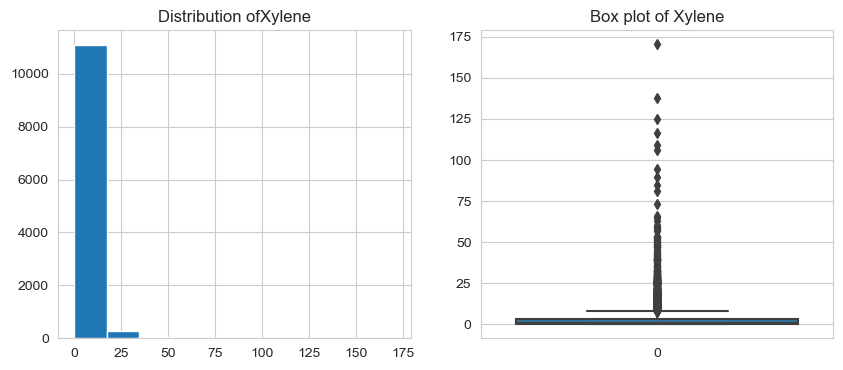

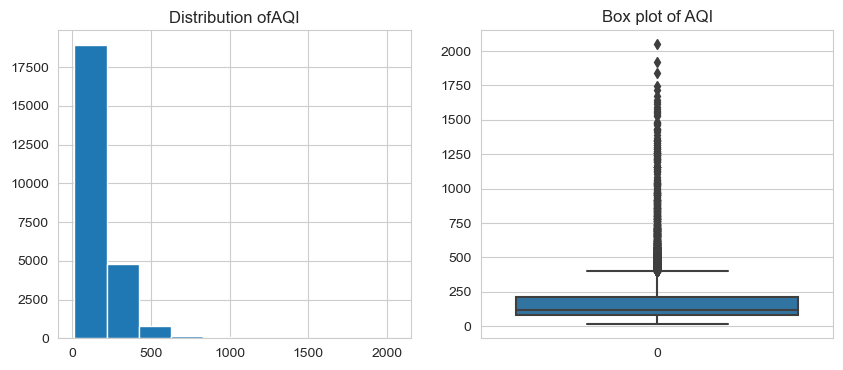

In [10]:
for column in feature_col:
    plt.figure(figsize = (10,4))
    
    plt.subplot(1,2,1)
    df[column].hist(figsize =(10,4))
    plt.title(f"Distribution of{column}")
    
    plt.subplot(1,2,2)
    sns.set_style("whitegrid")
    sns.boxplot(df[column])
    plt.title(f"Box plot of {column}")
    

In [11]:
import datetime
df['Date'] = df['Date'].astype('str')
df['Date']

0        2015-01-01
1        2015-01-02
2        2015-01-03
3        2015-01-04
4        2015-01-05
            ...    
29526    2020-06-27
29527    2020-06-28
29528    2020-06-29
29529    2020-06-30
29530    2020-07-01
Name: Date, Length: 29531, dtype: object

In [12]:
df['Year'] = df['Date'].str.split('-').str.get(0) 
df['Month'] = df['Date'].str.split('-').str.get(1)

In [13]:
for column in feature_col:
    month_mean = df.groupby(['City','Year','Month'])[column].mean().reset_index()
    month_mean.rename(columns ={column : 'Temp'}, inplace = True)

    df = pd.merge(df, month_mean, on = ['City','Year','Month'], how ='left')
    df[column] = df.apply(lambda row: row['Temp'] if pd.isnull(row[column]) else row[column], axis = 1)
    df.drop(columns = ['Temp'], inplace = True)


In [14]:
df.isnull().sum()

City              0
Date              0
PM2.5          3249
PM10           9724
NO             2084
NO2            2116
NOx            3152
NH3            9023
CO              730
SO2            2055
O3             2204
Benzene        4121
Toluene        6803
Xylene        17096
AQI            2749
AQI_Bucket     4681
Year              0
Month             0
dtype: int64

In [15]:
df_copy = df.copy()

In [16]:
for column in feature_col:
    year_mean = df.groupby(['City','Year'])[column].mean().reset_index()
    year_mean.rename(columns ={column : 'Temp'}, inplace = True)

    df = pd.merge(df, year_mean, on = ['City','Year'], how ='left')
    df[column] = df.apply(lambda row: row['Temp'] if pd.isnull(row[column]) else row[column], axis = 1)
    df.drop(columns = ['Temp'], inplace = True)

In [17]:
df.isnull().sum()

City              0
Date              0
PM2.5          1764
PM10           7750
NO             1108
NO2            1108
NOx            1181
NH3            7019
CO                0
SO2             743
O3              893
Benzene        2779
Toluene        5153
Xylene        15357
AQI            1143
AQI_Bucket     4681
Year              0
Month             0
dtype: int64

In [18]:
for column in feature_col:
    city_mean = df.groupby(['City'])[column].mean().reset_index()
    city_mean.rename(columns ={column : 'Temp'}, inplace = True)

    df = pd.merge(df, city_mean, on = ['City'], how ='left')
    df[column] = df.apply(lambda row: row['Temp'] if pd.isnull(row[column]) else row[column], axis = 1)
    df.drop(columns = ['Temp'], inplace = True)

In [19]:
df.isnull().sum()

City              0
Date              0
PM2.5             0
PM10           2009
NO                0
NO2               0
NOx            1169
NH3            2009
CO                0
SO2               0
O3              162
Benzene        2732
Toluene        4010
Xylene        13047
AQI               0
AQI_Bucket     4681
Year              0
Month             0
dtype: int64

In [20]:
for column in feature_col:
    column_mean = df[column].mean()
    df[column] = df[column].fillna(column_mean)

In [21]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
Year             0
Month            0
dtype: int64

In [22]:
df_copy2=  df.copy()

## AQI Category (Range)¶
## Good (0-50)
## Satisfactory (51-100)
## Moderate (101-200)
## Poor (201-300)
## Very poor (301-400)
## Severe (401-500)

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') ### Heatmap of location of null values in dataset

In [31]:
df['AQI_Bucket'].unique()

array(['Very Poor', 'Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good'],
      dtype=object)

In [29]:
df['AQI_Bucket'] = np.where(((df.AQI >0)&(df.AQI <=50)),'Good',df['AQI_Bucket'])
df['AQI_Bucket'] = np.where(((df.AQI >50)&(df.AQI <=100)),'Satisfactory',df['AQI_Bucket'])
df['AQI_Bucket'] = np.where(((df.AQI >100)&(df.AQI <=200)),'Moderate',df['AQI_Bucket'])
df['AQI_Bucket'] = np.where(((df.AQI >200)&(df.AQI <=300)),'Poor',df['AQI_Bucket'])
df['AQI_Bucket'] = np.where(((df.AQI >300)&(df.AQI <=400)),'Very Poor',df['AQI_Bucket'])
df['AQI_Bucket'] = np.where((df.AQI >400),'Severe',df['AQI_Bucket'])

In [30]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Year          0
Month         0
dtype: int64

In [34]:
df_final = df.copy(deep = True)

In [88]:
city_record_count = df.groupby(['AQI_Bucket'])['City'].count().reset_index()
city_record_count

,AQI_Bucket,City
0,Good,1488
1,Moderate,11388
2,Poor,3160
3,Satisfactory,8764
4,Severe,1692
5,Very Poor,3039


In [47]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year',
       'Month'],
      dtype='object')

Text(0, 0.5, 'City count in AQI Bucket between 2015-2020')

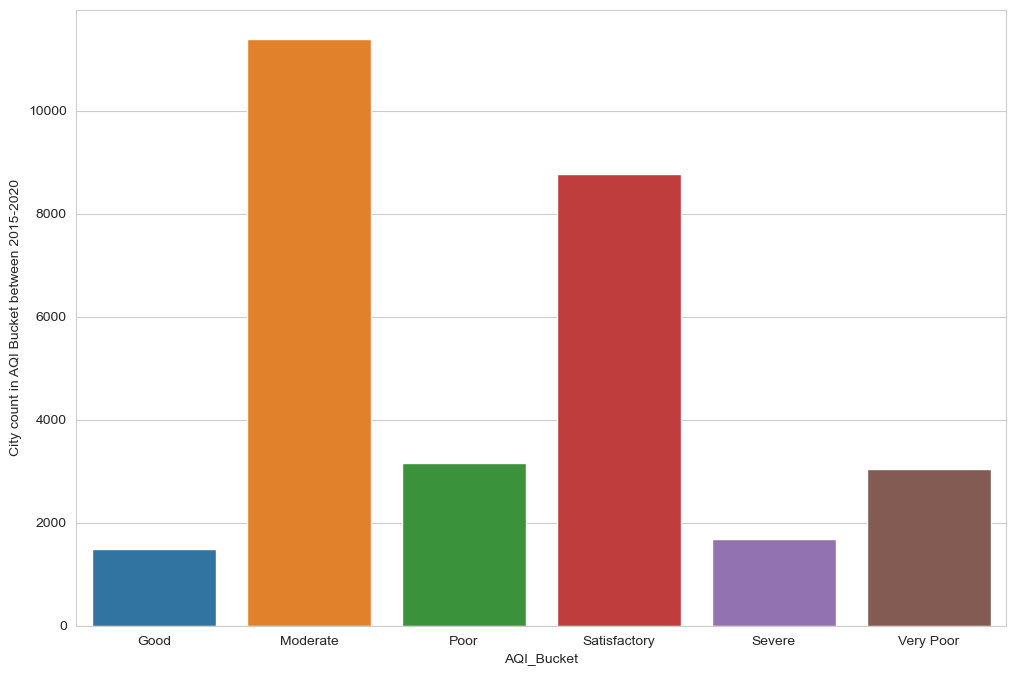

In [91]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'AQI_Bucket',y = 'City', data= city_record_count)
plt.ylabel('City count in AQI Bucket between 2015-2020')

In [50]:
city_year_PM2_5 = df.groupby(['City','Year'])['PM2.5'].mean().reset_index()
city_year_PM2_5

,City,Year,PM2.5
0,Ahmedabad,2015,86.224252
1,Ahmedabad,2016,76.146540
2,Ahmedabad,2017,88.654852
3,Ahmedabad,2018,74.631582
4,Ahmedabad,2019,62.184108
...,...,...,...
98,Visakhapatnam,2016,44.691089
99,Visakhapatnam,2017,52.531461
100,Visakhapatnam,2018,50.878105
101,Visakhapatnam,2019,47.234593


In [82]:
parametric_cols = feature_col.drop('AQI')
parametric_cols

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene'],
      dtype='object')

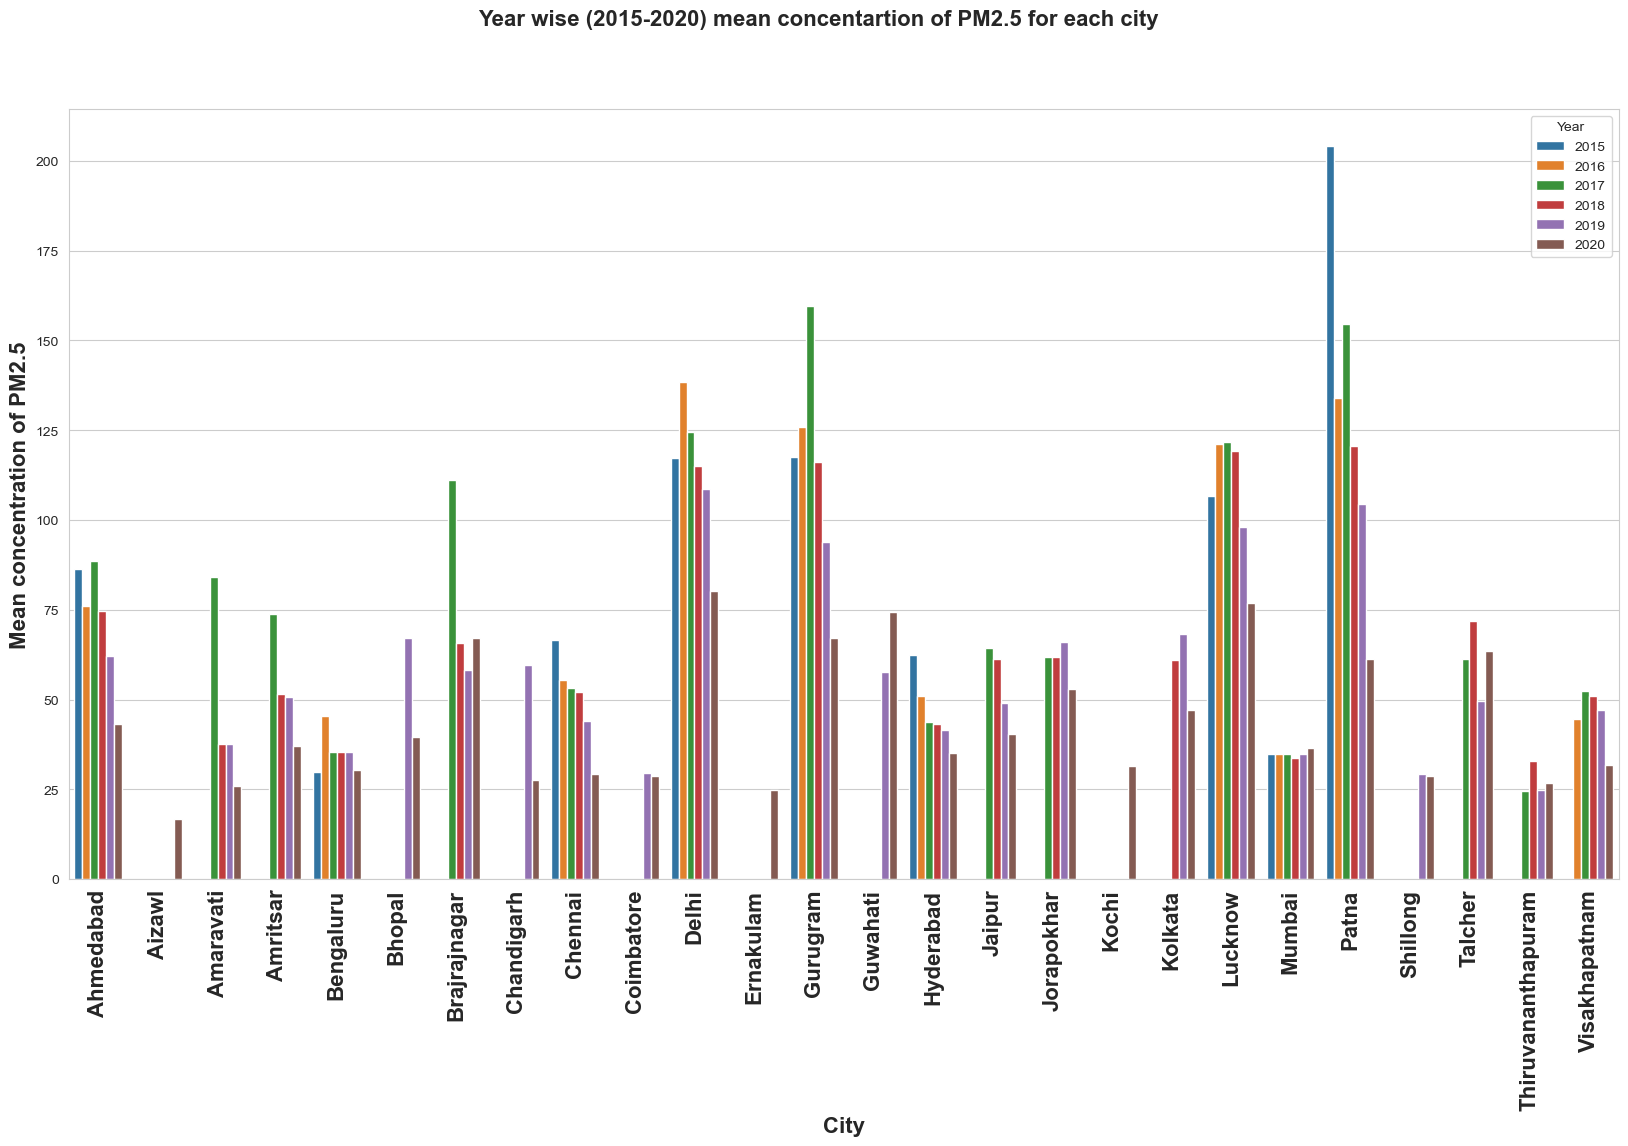

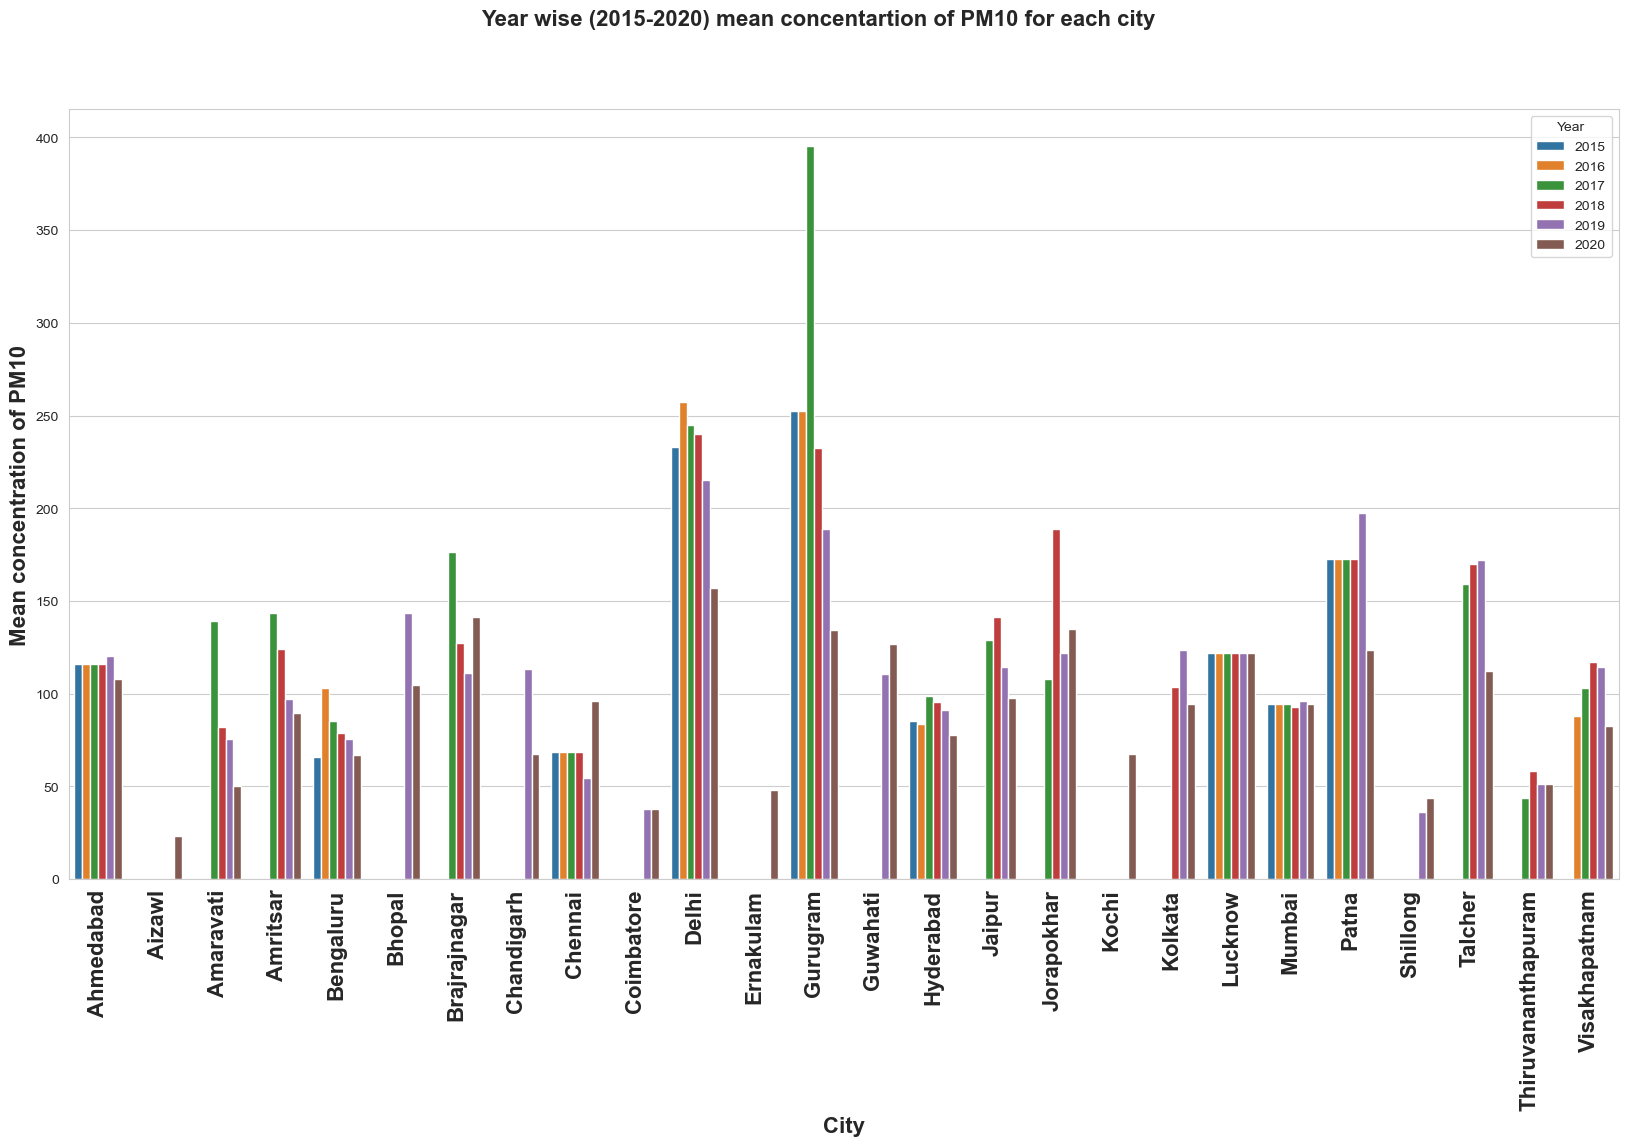

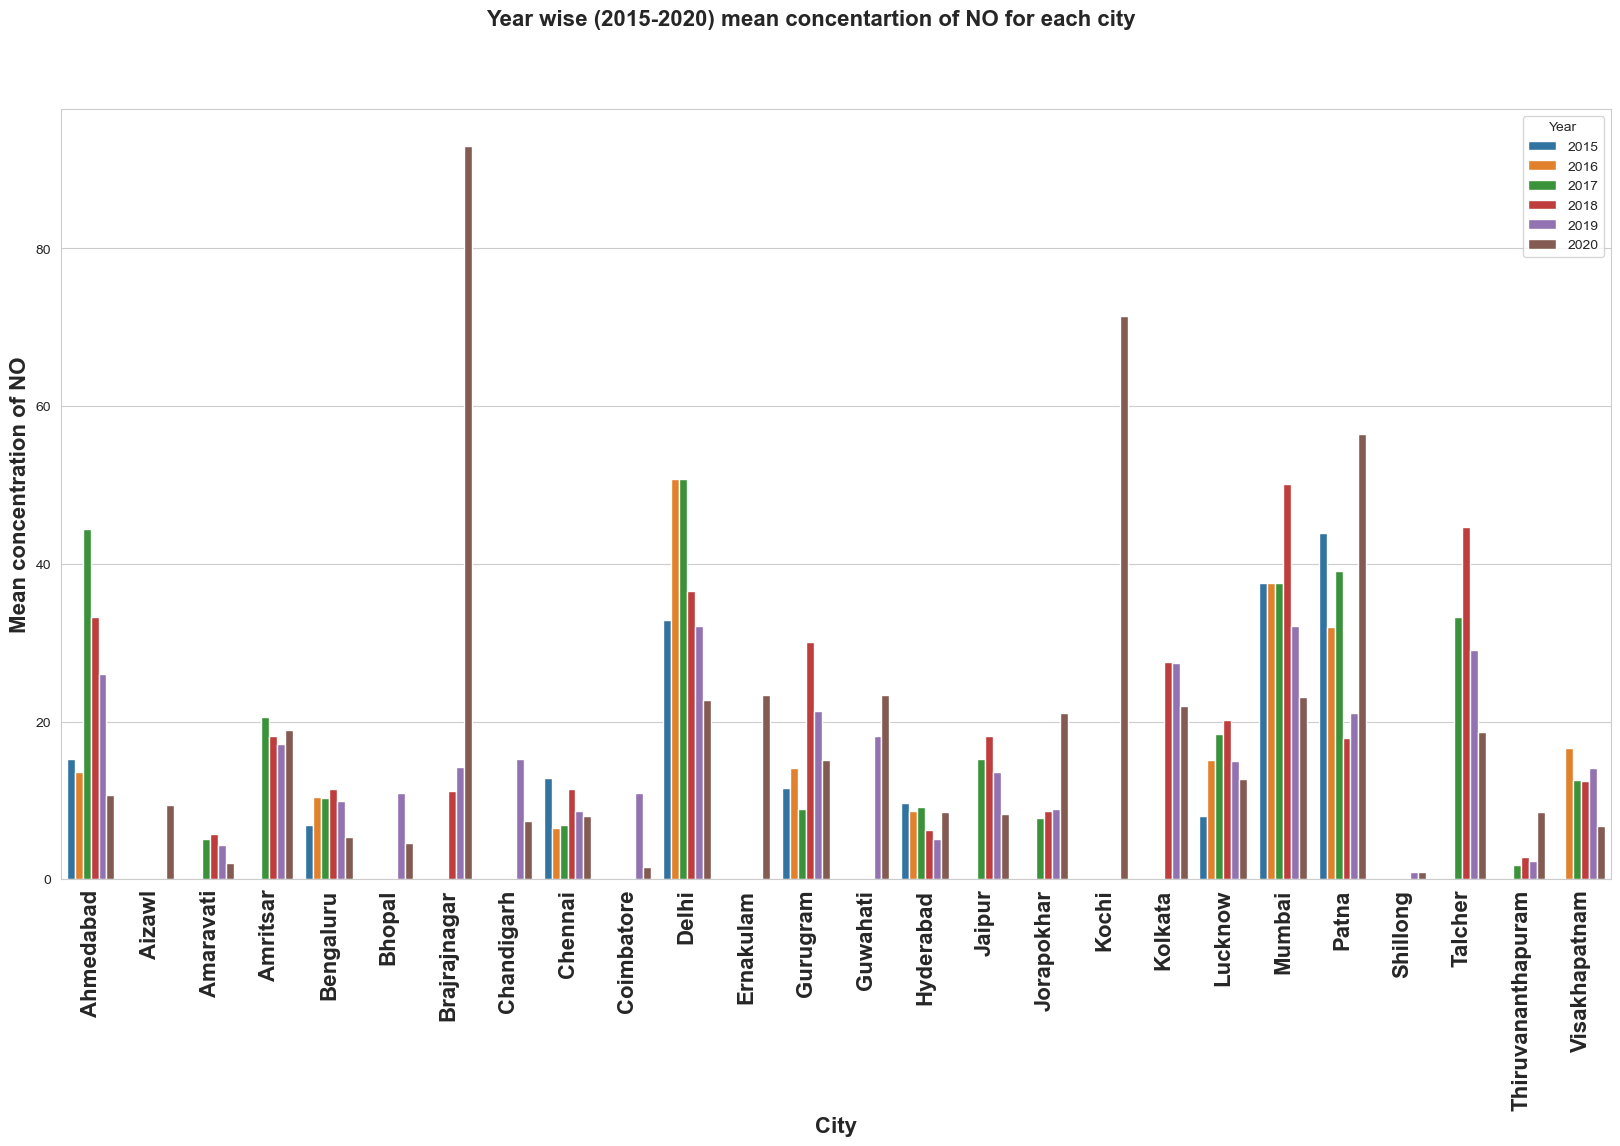

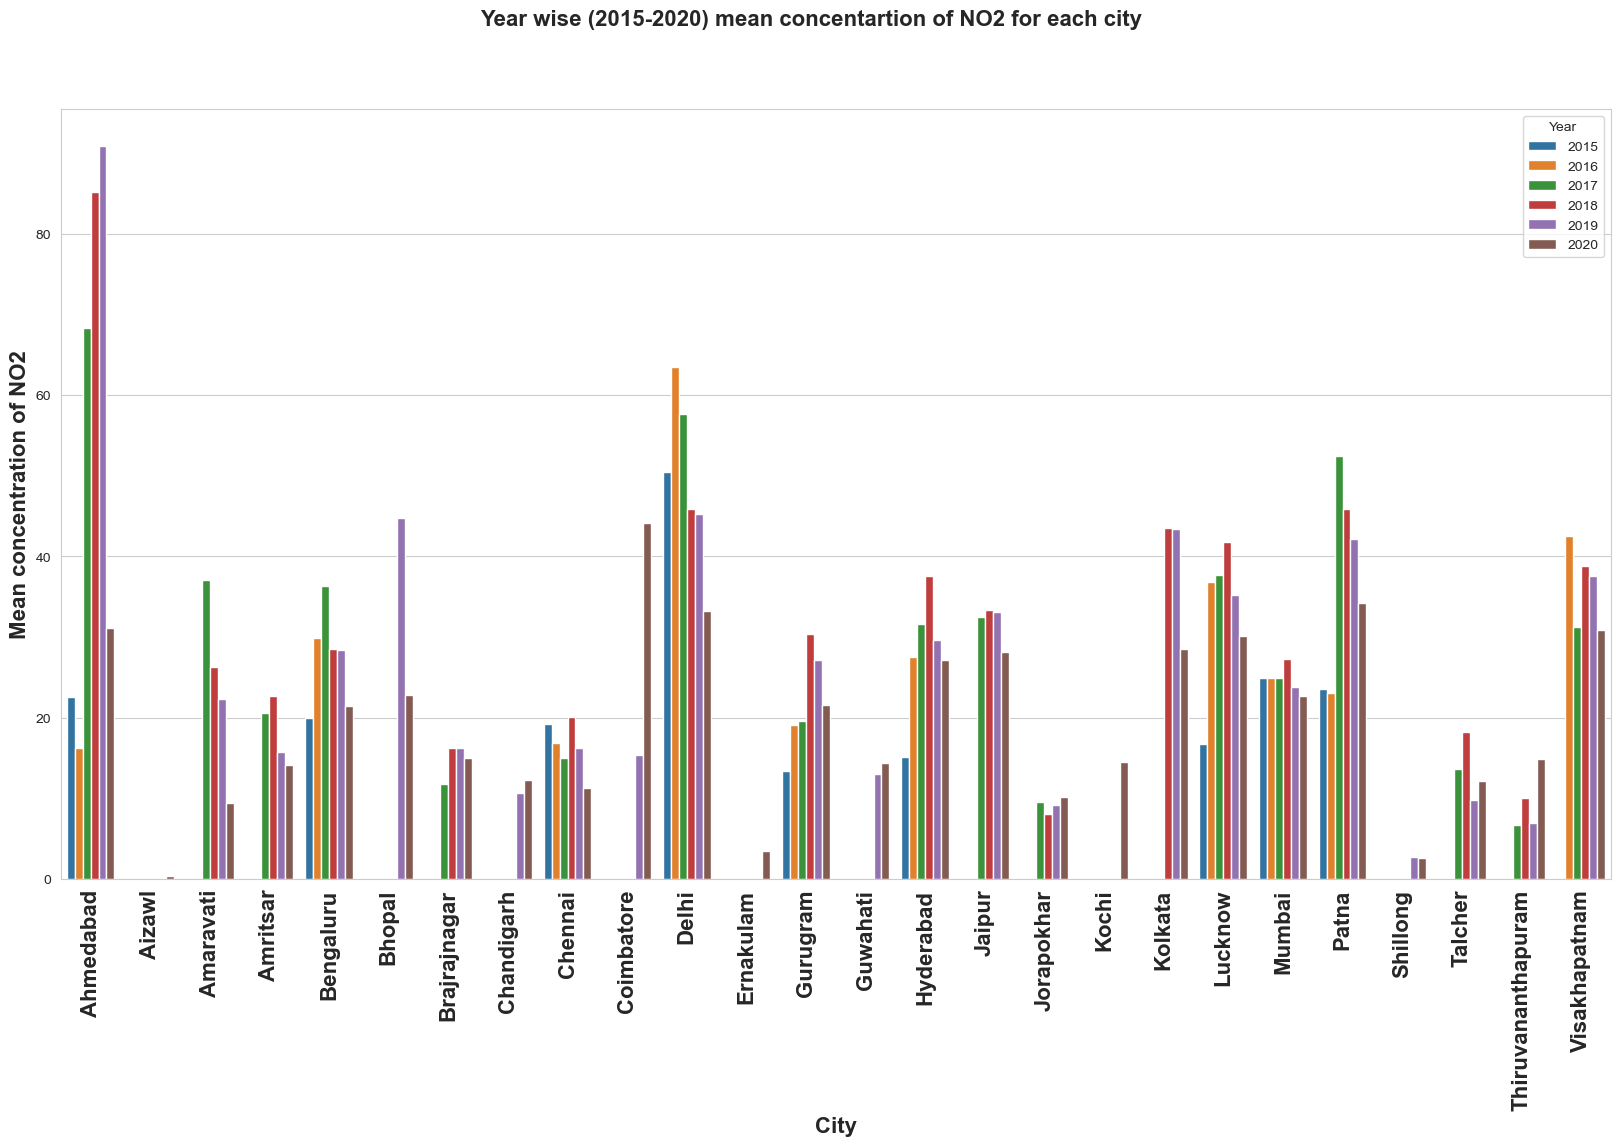

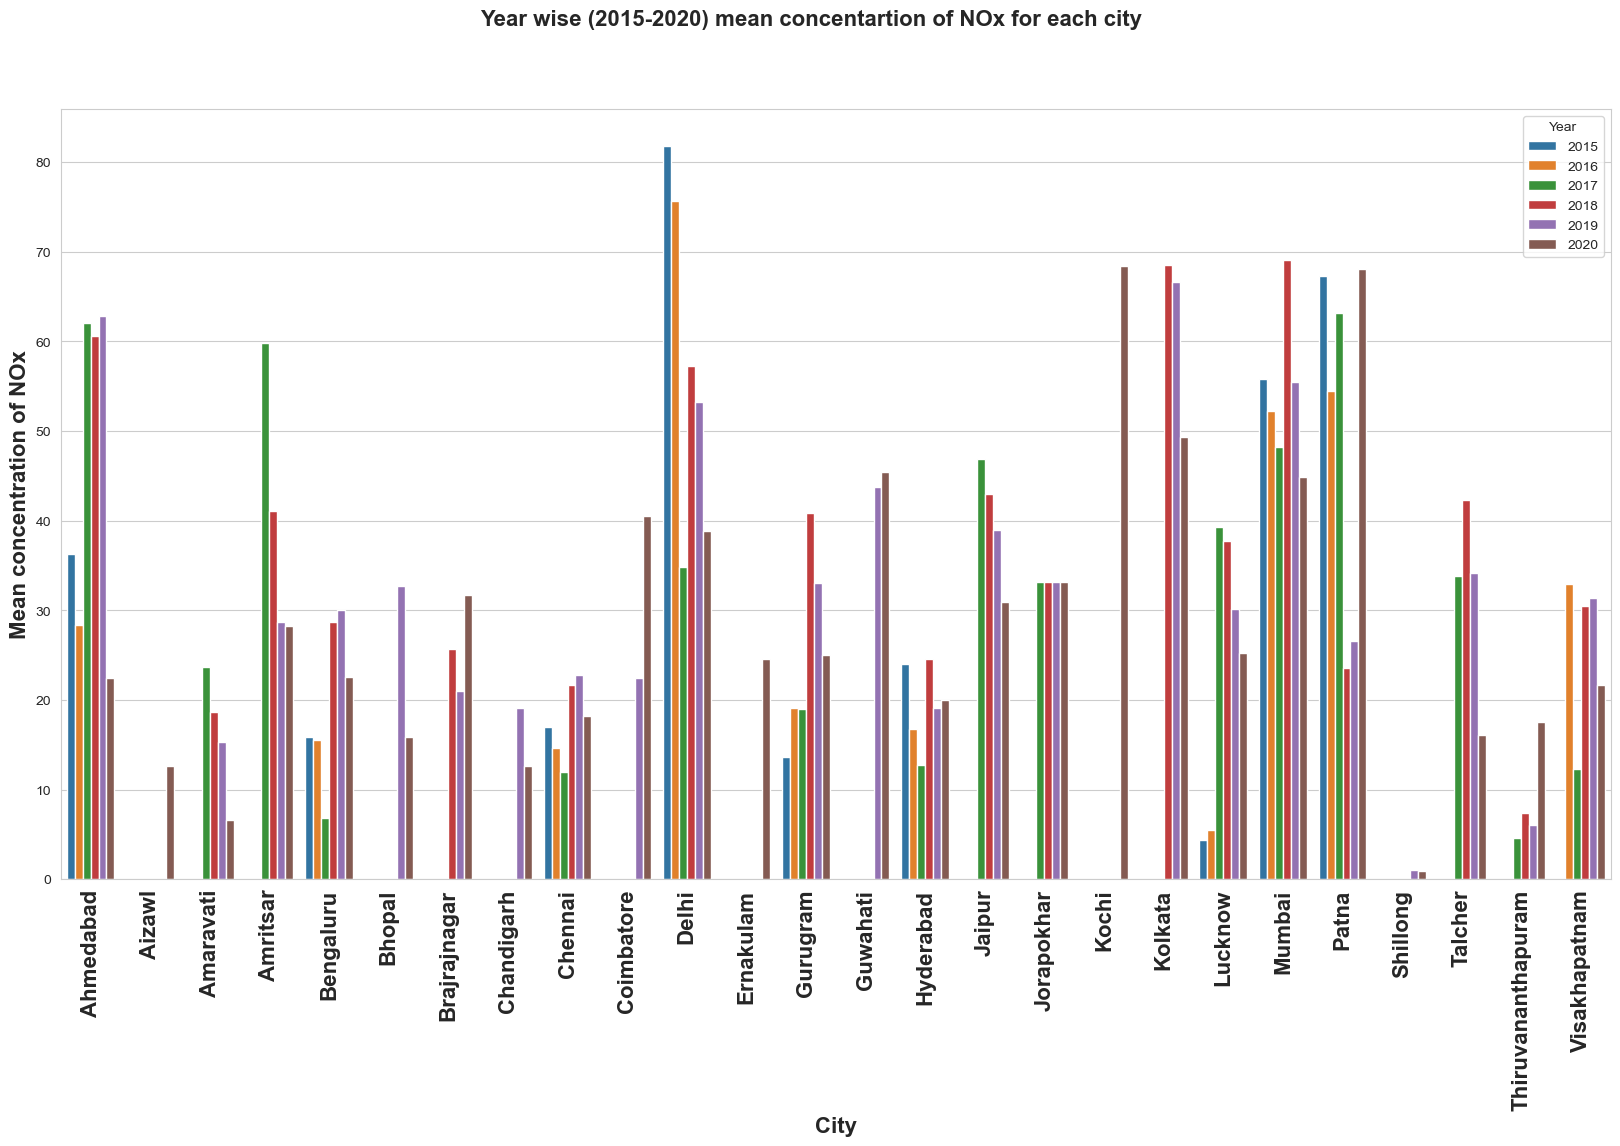

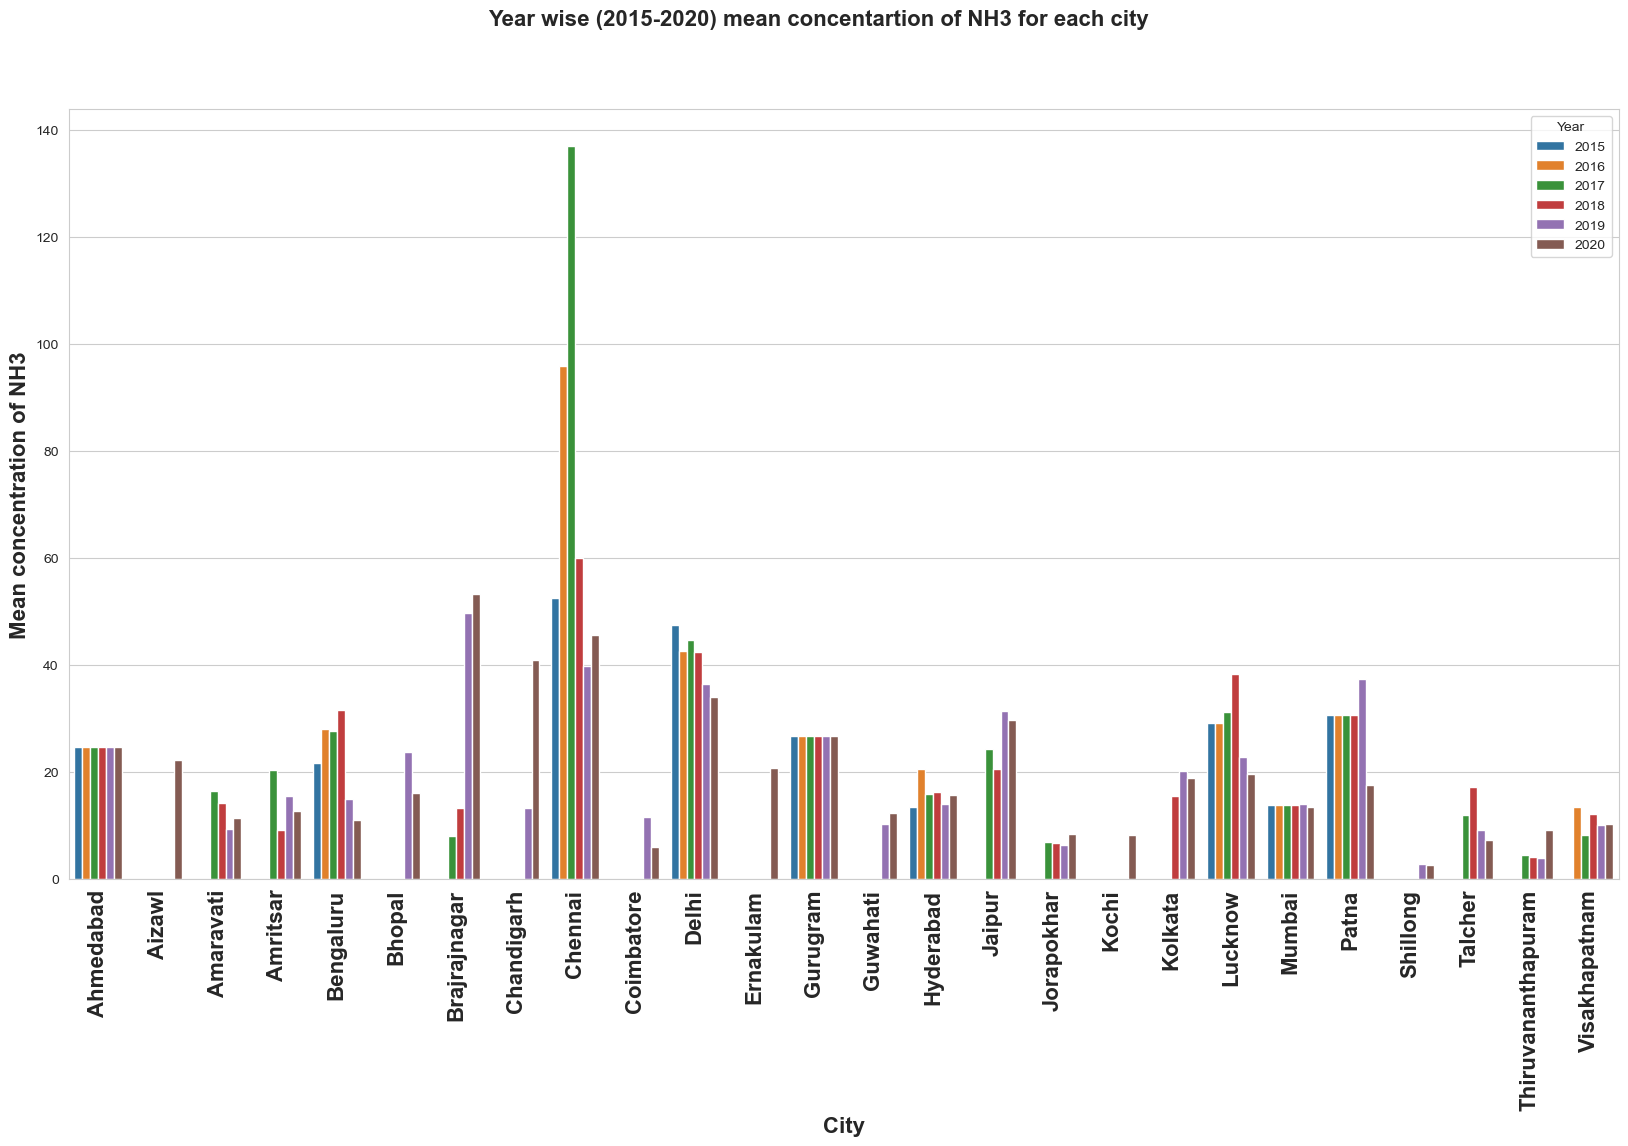

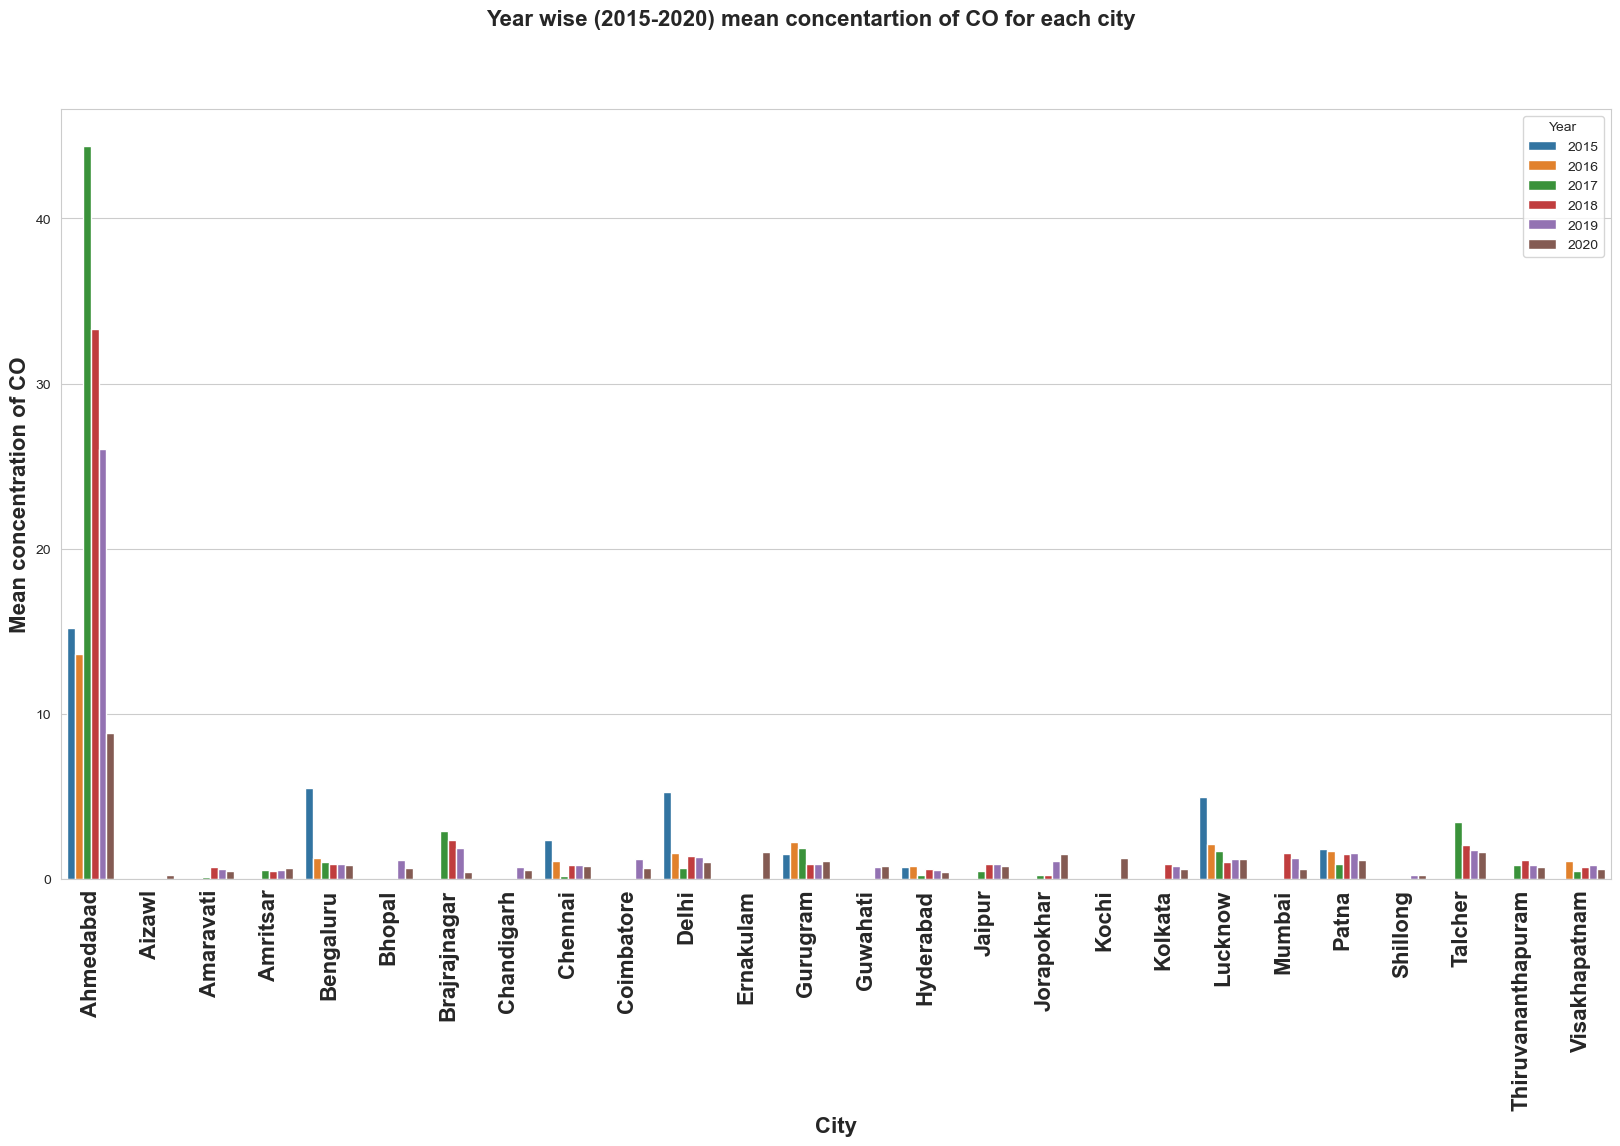

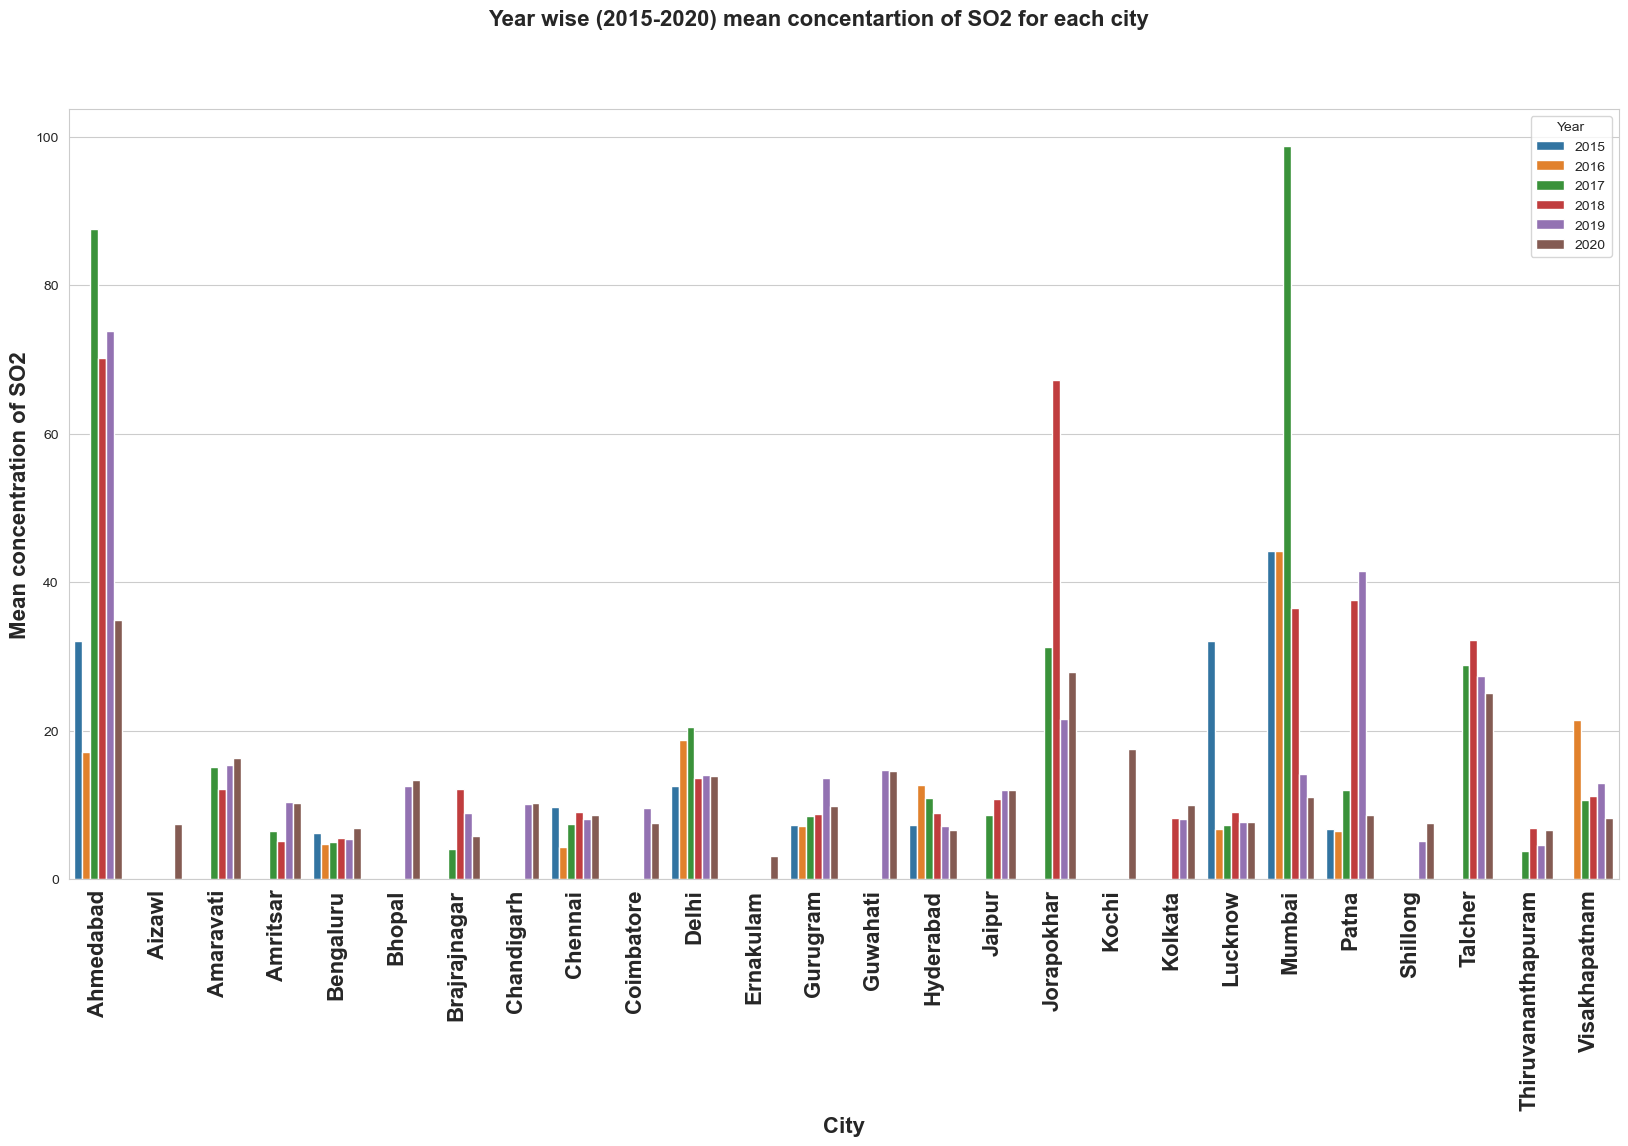

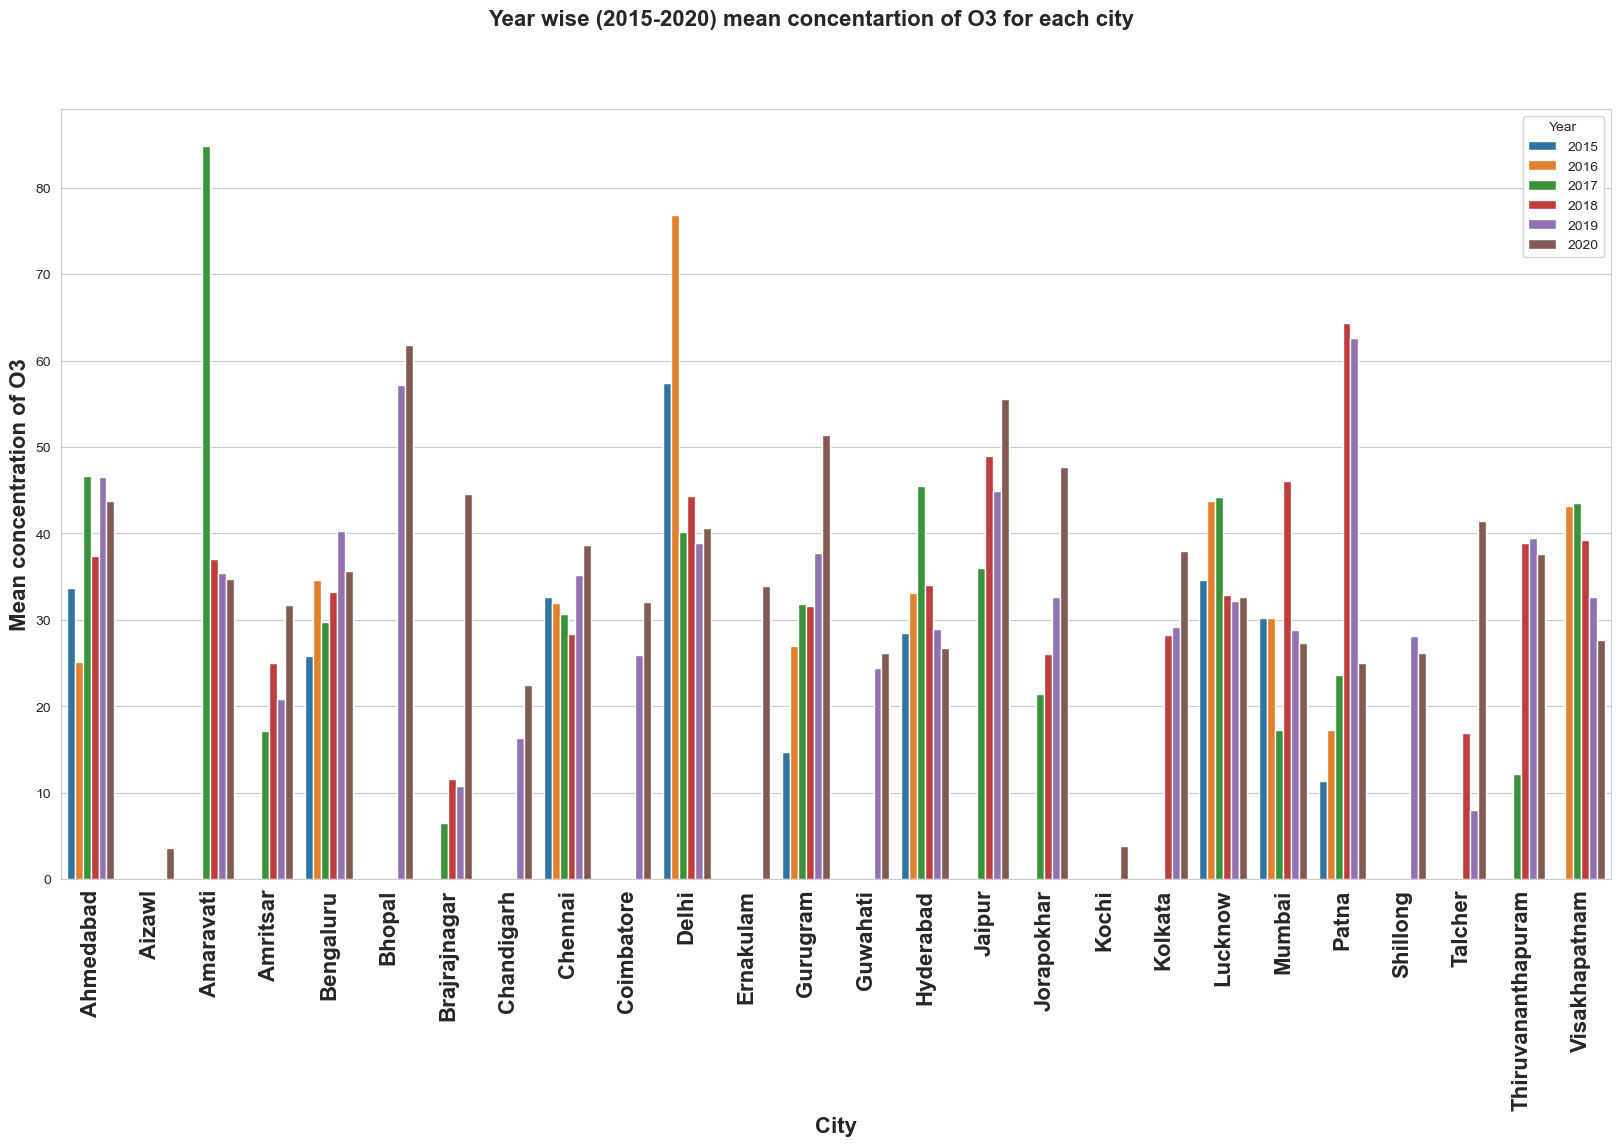

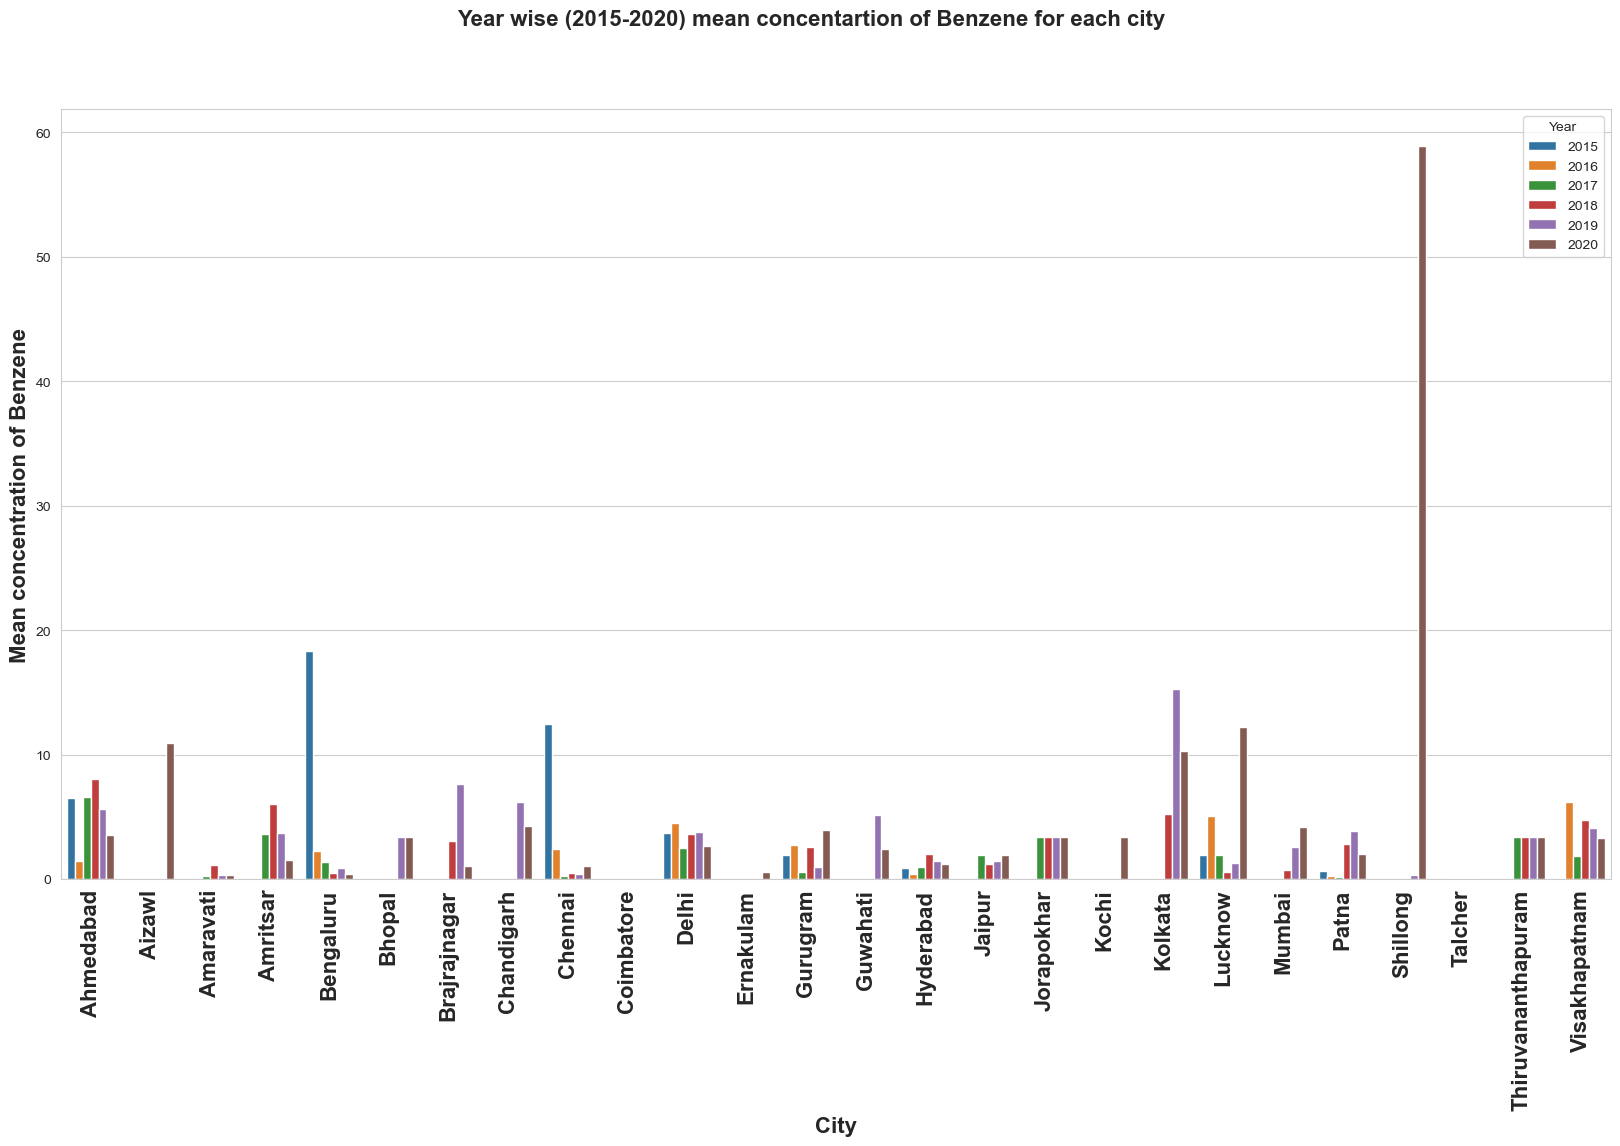

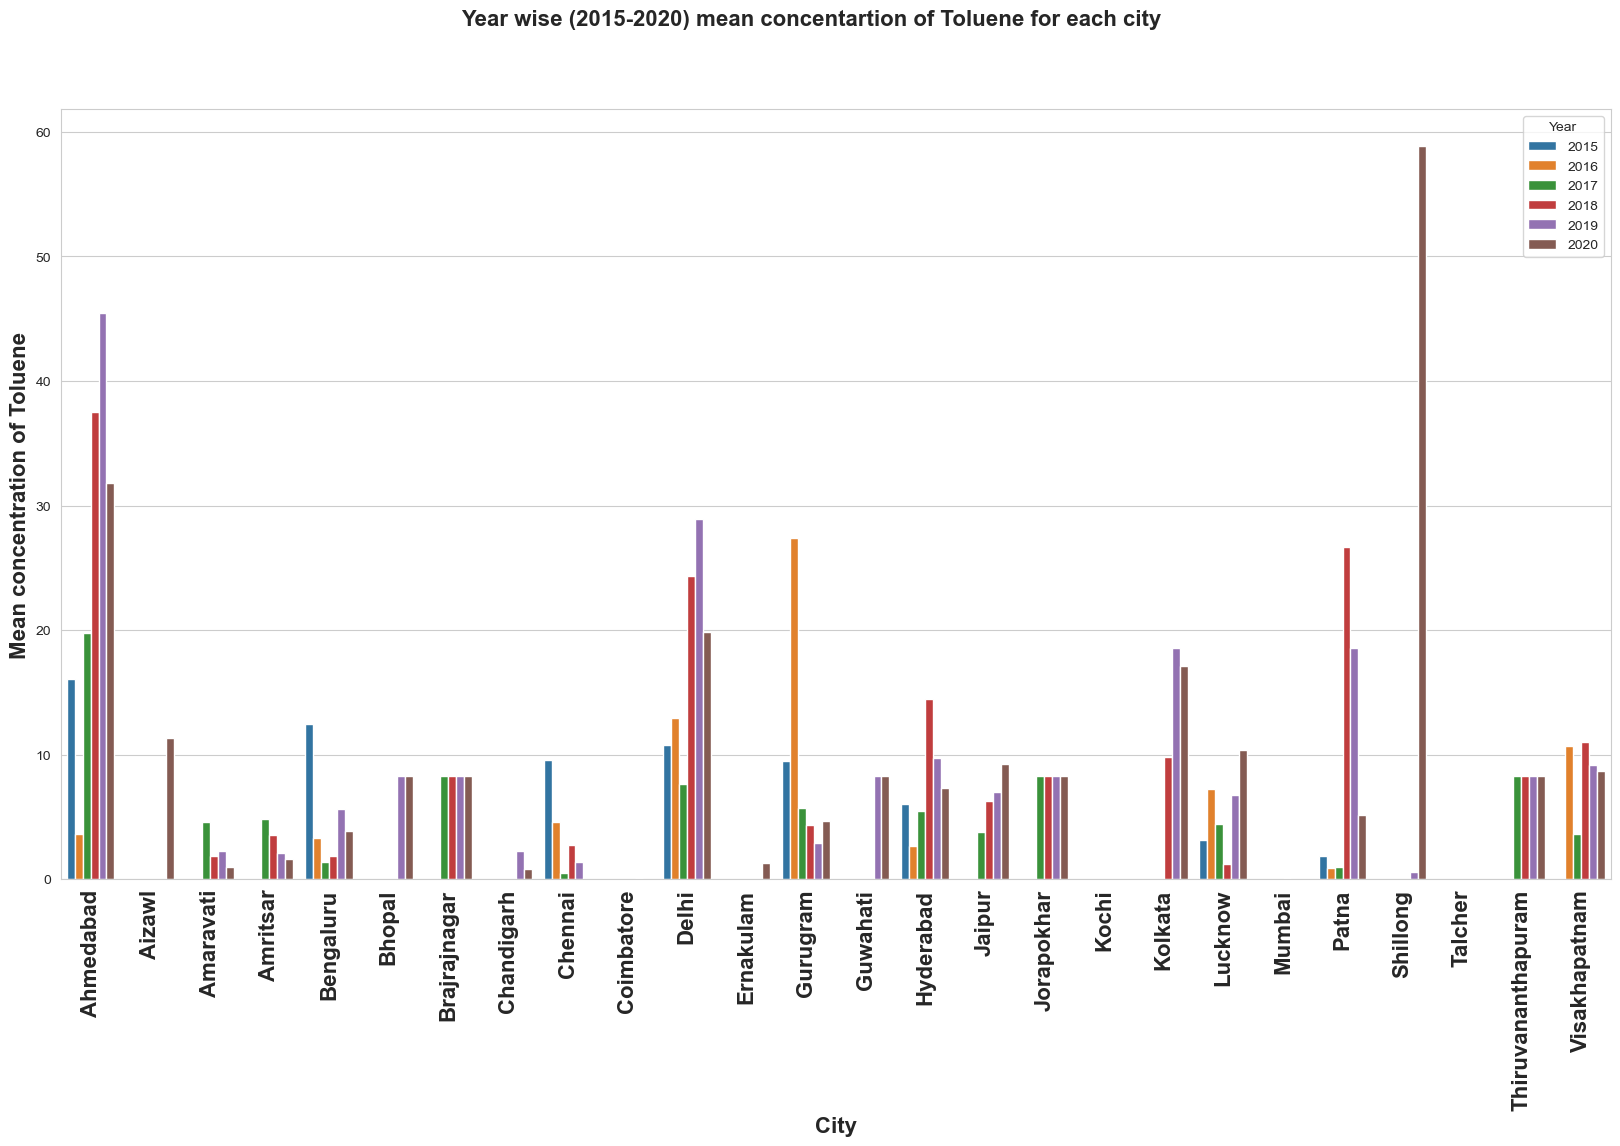

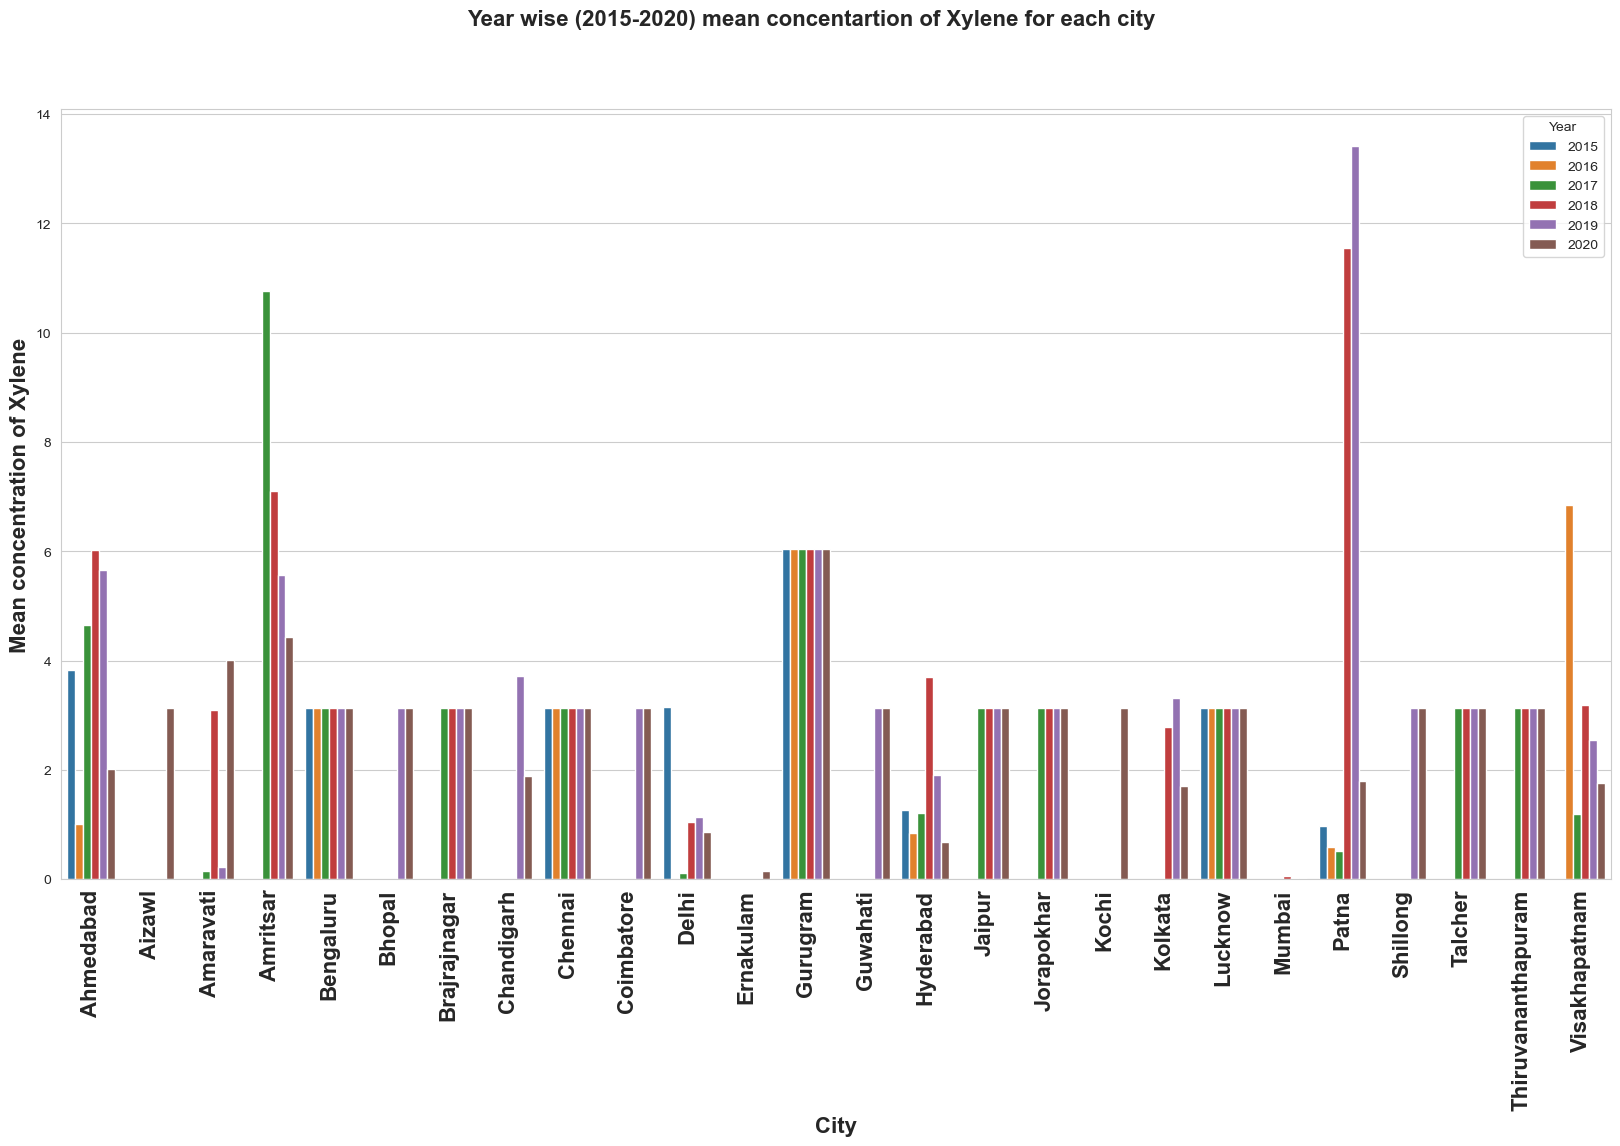

In [83]:
for column in parametric_cols:
    city_year = df.groupby(['City','Year'])[column].mean().reset_index()
    plt.figure(figsize = (20,10))
    plt.suptitle('Year wise (2015-2020) mean concentartion of {} for each city'.format(column), fontsize = 16, fontweight = 'bold')
    sns.barplot(x = 'City', y = column, hue = 'Year', data = city_year)
    plt.xticks(fontsize = 16, fontweight= 'bold',rotation = 90)
    plt.xlabel('City', fontsize = 16, fontweight ='bold')
    plt.ylabel('Mean concentration of {}'.format(column), fontsize = 16, fontweight = 'bold')

In [106]:
city_category_count = df.groupby(['City','AQI_Bucket'])['AQI'].count().reset_index()
city_category_count.sort_values(by = 'AQI', ascending = False)

,City,AQI_Bucket,AQI
102,Mumbai,Moderate,1510
22,Bengaluru,Satisfactory,1144
69,Hyderabad,Moderate,1075
4,Ahmedabad,Severe,986
42,Chennai,Satisfactory,959
...,...,...,...
78,Jaipur,Severe,2
87,Kochi,Poor,2
24,Bhopal,Good,2
105,Mumbai,Very Poor,1


Text(0.5, 0, 'City')

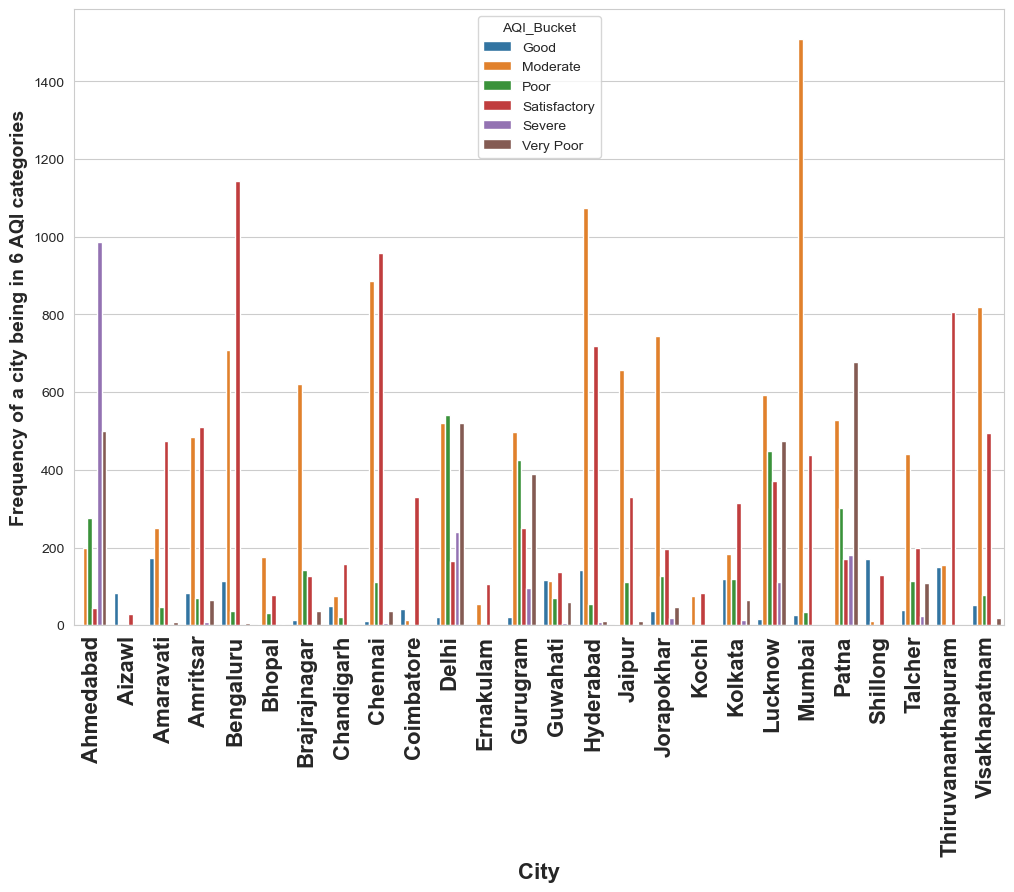

In [108]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'City',y = 'AQI', hue = 'AQI_Bucket', data= city_category_count)
plt.ylabel('Frequency of a city being in 6 AQI categories',fontsize = 14, fontweight= 'bold')
plt.xticks(fontsize = 16, fontweight= 'bold',rotation = 90)
plt.xlabel('City', fontsize = 16, fontweight ='bold')

# Analysis of Air Quality for Delhi

In [128]:
df_delhi = df_final[(df_final.City == 'Delhi')]
df_delhi

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,01
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,01
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,01
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,01
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate,2020,06
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate,2020,06
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor,2020,06
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate,2020,06


In [130]:
delhi_year_category_count = df_delhi.groupby(['Year','AQI_Bucket'])['AQI'].count().reset_index()
delhi_year_category_count.rename(columns = {'AQI':'category_frequency'}, inplace = True)
print(delhi_year_category_count)

    Year    AQI_Bucket  category_frequency
0   2015      Moderate                  51
1   2015          Poor                 130
2   2015  Satisfactory                   1
3   2015        Severe                  33
4   2015     Very Poor                 150
5   2016      Moderate                  84
6   2016          Poor                 105
7   2016  Satisfactory                   4
8   2016        Severe                  85
9   2016     Very Poor                  88
10  2017          Good                  21
11  2017      Moderate                  55
12  2017          Poor                  68
13  2017  Satisfactory                  58
14  2017        Severe                  44
15  2017     Very Poor                 119
16  2018      Moderate                 105
17  2018          Poor                 105
18  2018  Satisfactory                  35
19  2018        Severe                  38
20  2018     Very Poor                  82
21  2019      Moderate                 128
22  2019   

Text(0.5, 0, 'Year')

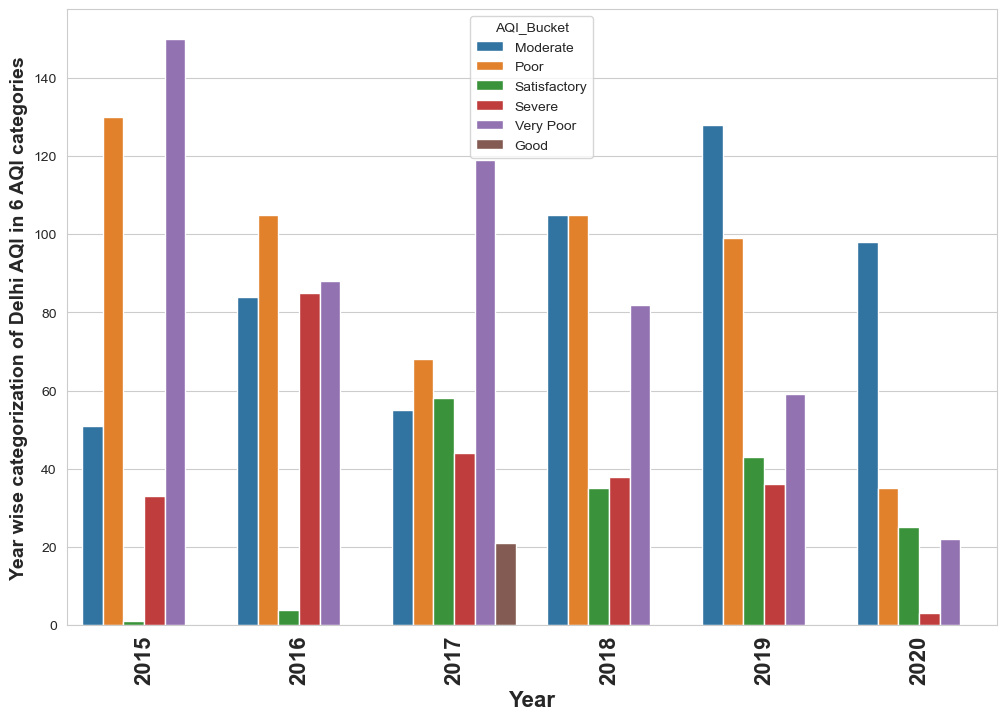

In [132]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'Year',y = 'category_frequency', hue = 'AQI_Bucket', data= delhi_year_category_count)
plt.ylabel('Year wise categorization of Delhi AQI in 6 AQI categories',fontsize = 14, fontweight= 'bold')
plt.xticks(fontsize = 16, fontweight= 'bold',rotation = 90)
plt.xlabel('Year', fontsize = 16, fontweight ='bold')

In [166]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [160]:
fig = px.line(df_delhi, x="Date", y="PM2.5")
fig.show()

In [167]:
df_delhi_year_15_16 = df_delhi[(df_delhi['Date']>='2015')&(df_delhi['Date']<'2016-03')]

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=df_delhi_year_15_16['Date'], y=df_delhi_year_15_16['PM2.5'], mode='lines', name='PM2.5'),row=1, col=1)
fig.add_trace(go.Scatter(x=df_delhi_year_15_16['Date'], y=df_delhi_year_15_16['PM10'], mode='lines', name='PM10'),row=1, col=2)
fig.update_layout(title='Delhi: Jan 2015-March 2016, PM2.5 and PM10',
                  xaxis_title='Date',
                  yaxis_title='Particulate Matter')
fig.show()

In [168]:
df_delhi_year_16_17 = df_delhi[(df_delhi['Date']>='2016-03')&(df_delhi['Date']<'2017-03')]

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=df_delhi_year_16_17['Date'], y=df_delhi_year_16_17['PM2.5'], mode='lines', name='PM2.5'),row=1, col=1)
fig.add_trace(go.Scatter(x=df_delhi_year_16_17['Date'], y=df_delhi_year_16_17['PM10'], mode='lines', name='PM10'),row=1, col=2)
fig.update_layout(title='Delhi: April 2016-March 2017, PM2.5 and PM10',
                  xaxis_title='Date',
                  yaxis_title='Particulate Matter')
fig.show()

In [169]:
df_delhi_year_17_18 = df_delhi[(df_delhi['Date']>='2017-03')&(df_delhi['Date']<'2018-03')]
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=df_delhi_year_17_18['Date'], y=df_delhi_year_17_18['PM2.5'], mode='lines', name='PM2.5'),row=1, col=1)
fig.add_trace(go.Scatter(x=df_delhi_year_17_18['Date'], y=df_delhi_year_17_18['PM10'], mode='lines', name='PM10'),row=1, col=2)
fig.update_layout(title='Delhi: April 2017-March 2018, PM2.5 and PM10',
                  xaxis_title='Date',
                  yaxis_title='Particulate Matter')
fig.show()

In [174]:
df_delhi_year_18_19 = df_delhi[(df_delhi['Date']>='2018-03')&(df_delhi['Date']<'2019-03')]
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=df_delhi_year_18_19['Date'], y=df_delhi_year_18_19['PM2.5'], mode='lines', name='PM2.5'),row=1, col=1)
fig.add_trace(go.Scatter(x=df_delhi_year_18_19['Date'], y=df_delhi_year_18_19['PM10'], mode='lines', name='PM10'),row=1, col=2)
fig.update_layout(title='Delhi: April 2018-March 2019, PM2.5 and PM10',
                  xaxis_title='Date',
                  yaxis_title='Particulate Matter')
fig.show() 

In [172]:
df_delhi_year_19_20 = df_delhi[(df_delhi['Date']>='2019-03')&(df_delhi['Date']<'2020-03')]
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=df_delhi_year_19_20['Date'], y=df_delhi_year_19_20['PM2.5'], mode='lines', name='PM2.5'),row=1, col=1)
fig.add_trace(go.Scatter(x=df_delhi_year_19_20['Date'], y=df_delhi_year_19_20['PM10'], mode='lines', name='PM10'),row=1, col=2)
fig.update_layout(title='Delhi: April 2019-March 2020, PM2.5 and PM10',
                  xaxis_title='Date',
                  yaxis_title='Particulate Matter')
fig.show()

In [175]:
df_delhi_year_20 = df_delhi[(df_delhi['Date']>='2020-03')&(df_delhi['Date']<'2020-12')]
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=df_delhi_year_20['Date'], y=df_delhi_year_20['PM2.5'], mode='lines', name='PM2.5'),row=1, col=1)
fig.add_trace(go.Scatter(x=df_delhi_year_20['Date'], y=df_delhi_year_20['PM10'], mode='lines', name='PM10'),row=1, col=2)
fig.update_layout(title='Delhi: April 2020-Dec 2020, PM2.5 and PM10',
                  xaxis_title='Date',
                  yaxis_title='Particulate Matter')
fig.show()

In [179]:
delhi_Mar_May_2019 =df_delhi[(df_delhi['Date'] >= '2019-03') & (df_delhi['Date'] < '2019-06')]
delhi_Mar_May_2020 =df_delhi[(df_delhi['Date'] >= '2020-03') & (df_delhi['Date'] < '2020-06')]

In [180]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = delhi_Mar_May_2019['Date'], y = delhi_Mar_May_2019['PM2.5'],
                    mode='lines+markers',
                    name='PM2.5 levels of 2019'))
fig.add_trace(go.Scatter(x = delhi_Mar_May_2019['Date'], y = delhi_Mar_May_2020['PM2.5'],
                    mode='lines+markers',
                    name='PM2.5 levels of 2020'))

fig.show()

In [181]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = delhi_Mar_May_2019['Date'], y = delhi_Mar_May_2019['PM10'],
                    mode='lines+markers',
                    name='PM10 levels of 2019'))
fig.add_trace(go.Scatter(x = delhi_Mar_May_2019['Date'], y = delhi_Mar_May_2020['PM10'],
                    mode='lines+markers',
                    name='PM10 levels of 2020'))
fig.show()

In [183]:
fig = px.line(df_delhi, x="Date", y="AQI")
fig.show()

In [184]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = delhi_Mar_May_2019['Date'], y = delhi_Mar_May_2019['AQI'],
                    mode='lines+markers',
                    name='AQI levels of 2019'))
fig.add_trace(go.Scatter(x = delhi_Mar_May_2019['Date'], y = delhi_Mar_May_2020['AQI'],
                    mode='lines+markers',
                    name='AQI levels of 2020'))
fig.show()